<a href="https://colab.research.google.com/github/mimkd13/PersianText-SA-DL/blob/main/Filimo_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment Description:**  
This code is part of a thesis-related experiment that focuses on sentiment analysis of Digikala website user comments. The process begins by preprocessing the comments to ensure clean and uniform textual data. Following this, FastText embeddings are generated to represent words within a meaningful vector space. Finally, the sentiment classification task leverages both CNN and LSTM neural network architectures to accurately capture and interpret the expressed sentiments.


**1. Importing Libraries**

**Description:**  
In this section, we first install the required libraries, then we import them in separate blocks for better organization. Additionally, short comments are provided for each library to clarify their usage.  
- First, we install and import Persian NLP libraries (`hazm`, `dadmatools`).  
- Then, we import general-purpose libraries for data science, machine learning, and text processing.  
- If needed, we install `fasttext` in a separate block.


In [ ]:
# Installing Persian NLP libraries
!pip install hazm
!pip install dadmatools

# Installing fasttext if needed
!pip install fasttext

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 17.9 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=3d69f816a0d05f4d28633e45e24558eb4ccf78aecd6d478baa5029c475dbdeba
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dadmatools to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.4/427.4 kB 37.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 10.2 MB/s eta 

In [ ]:
# Importing Persian NLP libraries
import hazm           # For Persian NLP tasks (tokenization, normalization, stemming, etc.)
import dadmatools     # Persian NLP toolkit with extended features compared to hazm


In [ ]:
# Importing general-purpose libraries
import numpy as np                  # Numerical and matrix computations
import nltk                         # Natural Language Processing (primarily English)
import re                           # Regular expressions for pattern matching
import string                       # String processing utilities
import warnings                     # Managing and displaying warnings
import gensim                       # Topic modeling, word embeddings, and NLP tasks
from gensim.models import Doc2Vec   # Doc2Vec model for document embeddings
from sklearn.metrics.pairwise import cosine_similarity  # Compute cosine similarity between vectors
from configparser import ConfigParser                  # Parse configuration files
from functools import reduce                           # Apply a reducing function over a list
import pandas as pd                                    # Data analysis and DataFrame manipulation


In [ ]:
# Cloning the official fastText repository (Optional)
# This step is not strictly required to run FastText, but it may be useful for reference.
!git clone https://github.com/facebookresearch/fastText.git

# Downloading a pre-trained Persian FastText model
# This gives you a pre-trained embedding for Persian words.
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz

# Decompressing the downloaded model file
!gunzip cc.fa.300.bin.gz


Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (995/995), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 3998 (delta 886), reused 824 (delta 824), pack-reused 3003 (from 2)
Receiving objects: 100% (3998/3998), 8.30 MiB | 12.09 MiB/s, done.
Resolving deltas: 100% (2527/2527), done.
--2025-02-16 10:29:35--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.78, 13.226.210.25, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4502524724 (4.2G) [application/octet-stream]
Saving to: ‘cc.fa.300.bin.gz’

cc.fa.300.bin.gz    100%[===================>]   4.19G   149MB/s    in 49s     

2025-02-16 10:30:24 (87.8 MB/s) - ‘cc.fa.300.bin.gz’ saved [4502524724/4502524724]



In [ ]:
import fasttext

# Loading the pre-trained FastText model
# 'cc.fa.300.bin' is the Persian FastText embeddings file
ft = fasttext.load_model('cc.fa.300.bin')

# Example usage: Find the nearest neighbors to the given Persian phrase
neighbors = ft.get_nearest_neighbors('هوش مصنوعی')
print(neighbors)


[(0.8088415861129761, 'هوشمصنوعی'), (0.7026421427726746, 'شیرمصنوعی'), (0.701546311378479, 'ومصنوعی'), (0.7009400725364685, 'نورمصنوعی'), (0.6918334364891052, 'نیمه\u200cمصنوعی'), (0.6630370020866394, 'صنوعی'), (0.5502080321311951, 'مصنوعیگل'), (0.5443315505981445, 'مصنوعی2013'), (0.5439041256904602, 'منتظریان'), (0.5428822040557861, 'مصنوعیشوفر')]


**2. Loading the Dataset**

In [ ]:
try:
    # Loading the dataset from a CSV file with UTF-8 encoding
    data = pd.read_csv('/content/drive/MyDrive/Notebooks/Filimo-HL.csv', encoding='utf-8')
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully.


In [ ]:
data

,comment,time,type,lable
0,ادمین محترم فضای گالری آفلاین محدود یا نامحدود...,2019-10-30 12:13:12,comment,NaN
1,حجم ایرانسل رایگان نیست که نیم بهاست چرا همه ج...,2019-10-30 3:49:32,comment,NaN
2,تبریک میگم.این تخفیف تا کی ادامه داره؟ما دوماه...,2019-10-30 4:12:52,comment,NaN
3,هزار برابر نت کم میکنی شرتت پاره نشه 20 درص(د ...,2019-10-30 4:51:00,comment,NaN
4,سلام ببخشید من از طریق مرورگر تلویزیون وارد فی...,2019-10-30 10:02:47,comment,NaN
...,...,...,...,...
11471,چرا قابلیت دانلود پولی فیلمارو به سایتتون اضاف...,2016-10-30 21:27:36,comment,NaN
11472,چرا با ای پی ایران پخش نمیشه هیچی!!!!! خیلی عج...,2016-10-18 18:51:13,comment,NaN
11473,سعی کنیم ارتباطات واقعی انسانی را بر ارتباطات ...,2016-10-19 6:28:45,comment,NaN
11474,سلام به صفحه ما سر بزنید .صفحه ما فقط یک صفحه ...,2016-10-20 20:49:19,comment,NaN


**3. Preprocessing and Prepairing the Data**




In [ ]:
data_filtered = data[["comment", "lable"]]
data_filtered_cleaned = data_filtered[data_filtered['lable'].notna() & (data_filtered['lable'] != "")]
total_rows = data_filtered_cleaned.shape[0]
unique_counts = data_filtered_cleaned['lable'].value_counts()

print(f"Total number of rows with values: {total_rows}\n")

# Print unique values and their counts in an ordered manner
print("Number of unique values and their counts:")
for label, count in unique_counts.items():
    print(f"- {label}: {count}")

# Save the final dataframe in the variable final_data_filtered
final_data = data_filtered_cleaned.copy()


Total number of rows with values: 1118

Number of unique values and their counts:
- 1.0: 383
- 0.0: 373
- 2.0: 362


In [ ]:
final_data_filtered = final_data.copy()


**4. Preprocessing**

**Normalization**

In [ ]:
# Converting all values in the 'comment' column to strings to avoid AttributeError
final_data_filtered['comment'] = final_data_filtered['comment'].astype(str)

# Using the hazm library for text normalization
try:
    from hazm import Normalizer
    normalizer = Normalizer()
    # Applying the normalizer to the 'comment' column
    final_data_filtered['normalized_text'] = final_data_filtered['comment'].apply(normalizer.normalize)
except ImportError:
    # If hazm is not available in the current environment
    final_data_filtered['normalized_text'] = "Hazm library not available in this environment"

# Keeping only the 'comment', 'normalized_text', and 'label' columns in the final DataFrame
data_normalized = final_data_filtered[['comment', 'normalized_text', 'lable']]

# Displaying the final DataFrame
data_normalized.head()


,comment,normalized_text,lable
7,فيلم خوبي بود ولي نه فوق العاده. البته بر اساس...,فیلم خوبی بود ولی نه فوق‌العاده. البته بر اساس...,1.0
11,من اصلا این فیلمو دوس نداشتم.مهیج بود اواسطش. ...,من اصلا این فیلمو دوس نداشتم. مهیج بود اواسطش....,0.0
20,الان یک ساعته سرورهاتون قطعه و اصلا نمیشه هیچ ...,الان یک ساعته سرورهاتون قطعه و اصلا نمیشه هیچ ...,0.0
22,سرور مشکل داره من الان دارم هی میزنم همش ارور ...,سرور مشکل داره من الان دارم هی می‌زنم همش ارور...,0.0
23,يكي نيست جوابگو باشه من اشتراك خريدم فيلمهارو ...,یکی نیست جوابگو باشه من اشتراک خریدم فیلمهارو ...,0.0


**Tokenization**

In [ ]:
import pandas as pd
from hazm import WordTokenizer

# List to store tokens and labels
tokenized_data = []

# Initializing the tokenizer
word_tokenizer = WordTokenizer()

# Tokenizing the 'normalized_text' column and storing results
for index, row in data_normalized.iterrows():
    tokens = word_tokenizer.tokenize(row['normalized_text'])
    label = row['lable']
    tokenized_data.append({'tokens': tokens, 'lable': label})

# Creating a new DataFrame with tokens and labels
tokenized_df = pd.DataFrame(tokenized_data)

# Displaying the resulting DataFrame
print(tokenized_df.head())


                                              tokens  lable
0  [فیلم, خوبی, بود, ولی, نه, فوق‌العاده, ., البت...    1.0
1  [من, اصلا, این, فیلمو, دوس, نداشتم, ., مهیج, ب...    0.0
2  [الان, یک, ساعته, سرورهاتون, قطعه, و, اصلا, نم...    0.0
3  [سرور, مشکل, داره, من, الان, دارم, هی, می‌زنم,...    0.0
4  [یکی, نیست, جوابگو, باشه, من, اشتراک, خریدم, ف...    0.0


In [ ]:
tokenized_df

,tokens,lable
0,"[فیلم, خوبی, بود, ولی, نه, فوق‌العاده, ., البت...",1.0
1,"[من, اصلا, این, فیلمو, دوس, نداشتم, ., مهیج, ب...",0.0
2,"[الان, یک, ساعته, سرورهاتون, قطعه, و, اصلا, نم...",0.0
3,"[سرور, مشکل, داره, من, الان, دارم, هی, می‌زنم,...",0.0
4,"[یکی, نیست, جوابگو, باشه, من, اشتراک, خریدم, ف...",0.0
...,...,...
1113,"[گوهر, خیراندیش, تمام, نقشا, و, بازیاش, شده, ع...",0.0
1114,"[خیلی, اعصاب, خورد, کنه, من, دو, قسمت, اول, رو...",0.0
1115,"[چقدر, این, قسمتش, خوب, و, خنده‌دار, بود, همین...",2.0
1116,"[شاهکاری, دیگر, از, مهران, مدیری, سریالی, که, ...",2.0


**Lemmatization**

In [ ]:
import pandas as pd
from hazm import Lemmatizer

# Initializing the lemmatizer
lemmatizer = Lemmatizer()

# List to store lemmatized tokens and labels
lemmatized_data = []

# Applying the lemmatizer to each token in the dataset
for index, row in tokenized_df.iterrows():
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in row['tokens']]
    label = row['lable']
    lemmatized_data.append({'lemmatized_tokens': lemmatized_tokens, 'label': label})

# Creating a new DataFrame with the lemmatized tokens and labels
lemmatized_df = pd.DataFrame(lemmatized_data)

# Displaying the first few rows of the new DataFrame
print(lemmatized_df.head())


                                   lemmatized_tokens  label
0  [فیلم, خوبی, بود#است, ولی, نه, فوق‌العاده, ., ...    1.0
1  [من, اصلا, این, فیلمو, دوس, داشت#دار, ., مهیج,...    0.0
2  [الان, یک, ساعته, سرورهاتون, قطعه, و, اصلا, نم...    0.0
3  [سرور, مشکل, داره, من, الان, داشت#دار, هی, زد#...    0.0
4  [یکی, نیست, جوابگو, باشه, من, اشتراک, خرید#خر,...    0.0


In [ ]:
lemmatized_df

,lemmatized_tokens,label
0,"[فیلم, خوبی, بود#است, ولی, نه, فوق‌العاده, ., ...",1.0
1,"[من, اصلا, این, فیلمو, دوس, داشت#دار, ., مهیج,...",0.0
2,"[الان, یک, ساعته, سرورهاتون, قطعه, و, اصلا, نم...",0.0
3,"[سرور, مشکل, داره, من, الان, داشت#دار, هی, زد#...",0.0
4,"[یکی, نیست, جوابگو, باشه, من, اشتراک, خرید#خر,...",0.0
...,...,...
1113,"[گوهر, خیراندیش, تمام, نقشا, و, بازیاش, شده, ع...",0.0
1114,"[خیلی, اعصاب, خورد#خور, کنه, من, دو, قسمت, اول...",0.0
1115,"[چقدر, این, قسمت, خوب, و, خنده‌دار, بود#است, ه...",2.0
1116,"[شاهکار, دیگر, از, مهران, مدیری, سریال, که, به...",2.0


**5. Token Indexing and Sequence Padding**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extracting lemmatized tokens from lemmatized_df
texts = lemmatized_df['lemmatized_tokens'].values

# Building a vocabulary dictionary
word_index = {}
index = 1
for tokens in texts:
    for token in tokens:
        if token not in word_index:
            word_index[token] = index
            index += 1

# Displaying the size of the vocabulary
vocab_size = len(word_index) + 1
print('Vocab size: {}'.format(vocab_size))

# Converting tokens into numeric sequences
encoded_texts = [[word_index[token] for token in tokens] for tokens in texts]

# Padding sequences to a fixed length
sentences_max_length = 256  # Maximum sentence length (adjustable)
padded_sequence = pad_sequences(encoded_texts, maxlen=sentences_max_length, padding='post')

# Adding the padded sequences to the DataFrame
lemmatized_df['padded_sequence'] = list(padded_sequence)

# Displaying final information
print('Number of padded sequences and its shape:')
print(padded_sequence.shape)
lemmatized_df.head()


Vocab size: 4067
Number of padded sequences and its shape:
(1118, 256)


,lemmatized_tokens,label,padded_sequence
0,"[فیلم, خوبی, بود#است, ولی, نه, فوق‌العاده, ., ...",1.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 7,..."
1,"[من, اصلا, این, فیلمو, دوس, داشت#دار, ., مهیج,...",0.0,"[14, 15, 16, 17, 18, 19, 7, 20, 3, 21, 7, 22, ..."
2,"[الان, یک, ساعته, سرورهاتون, قطعه, و, اصلا, نم...",0.0,"[25, 11, 26, 27, 28, 29, 15, 30, 31, 1, 32, 0,..."
3,"[سرور, مشکل, داره, من, الان, داشت#دار, هی, زد#...",0.0,"[33, 34, 35, 14, 25, 19, 36, 37, 38, 39, 40, 0..."
4,"[یکی, نیست, جوابگو, باشه, من, اشتراک, خرید#خر,...",0.0,"[41, 42, 43, 44, 14, 45, 46, 47, 48, 40, 49, 5..."


**6. Splitting Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Preparing data and labels
X = padded_sequence  # Padded sequences
y = lemmatized_df['label'].values  # Labels

# Splitting the dataset into training and testing sets
# test_size=0.3 means 30% of the data goes to the test set
# shuffle=True to randomize the samples before splitting
# random_state=42 for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the shape of each subset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (782, 256)
Shape of X_test: (336, 256)
Shape of y_train: (782,)
Shape of y_test: (336,)


In [ ]:
import numpy as np

# Convert to one-hot encoding
num_classes = 3
y_train_one_hot = np.eye(num_classes)[y_train.astype(int)]

print(y_train_one_hot)


[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
import numpy as np

# Convert to one-hot encoding
num_classes = 3
y_test_one_hot = np.eye(num_classes)[y_test.astype(int)]

print(y_test_one_hot)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
sentences_max_length = 70
lstm_units = 50

**7. Constructing the Embedding Matrix**

In [ ]:
import numpy as np

embedding_dim = 300  # Embedding vector size (usually 300 for FastText)
vocab_size = len(word_index) + 1  # Number of words in the dictionary
embedding_matrix = np.zeros((vocab_size, embedding_dim))  # Embedding matrix

# Constructing the embedding matrix using the FastText model
for word, i in word_index.items():
    try:
        embedding_vector = ft.get_word_vector(word)  # Retrieve feature vector from FastText
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # Store vector in the matrix
    except KeyError:
        continue  # Ignore words not found in the model

# Display the shape of the embedding matrix
print(f"Embedding matrix shape: {embedding_matrix.shape}")


Embedding matrix shape: (4067, 300)


**8. Building and Compiling the Model**

**9. Training the Model**

**LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Bidirectional

# Model definition
model = Sequential()
embedding_vector_length = 300
model.add(Embedding(vocab_size, embedding_vector_length, input_length=256, weights=[embedding_matrix], trainable=True))
model.add(Bidirectional(LSTM(32, dropout=0.0, recurrent_dropout=0.0)))
model.add(Dense(3, activation='softmax'))  # Added L2 regularization

# Optimizer with reduced learning rate
optimizer = Adam(learning_rate=1e-3)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=10, validation_data=[X_test,y_test_one_hot], callbacks=[early_stopping])

# Print model summary
print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 413ms/step - accuracy: 0.3824 - loss: 1.0892 - val_accuracy: 0.5893 - val_loss: 1.0347
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - accuracy: 0.7120 - loss: 0.9444 - val_accuracy: 0.6726 - val_loss: 0.8455
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - accuracy: 0.8209 - loss: 0.5748 - val_accuracy: 0.6488 - val_loss: 0.7498
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.9423 - loss: 0.2289 - val_accuracy: 0.6964 - val_loss: 0.8143
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 364ms/step - accuracy: 0.9803 - loss: 0.1183 - val_accuracy: 0.6667 - val_loss: 0.9050
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - accuracy: 0.9947 - loss: 0.0459 - val_accuracy: 0.6577 - val_loss: 1.0303


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 256, 300)            │       1,220,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          85,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,916,631 (14.94 MB)

 Trainable params: 1,305,543 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,611,088 (9.96 MB)

None


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Ensure y_true is properly defined
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # If y_test is one-hot encoded
    y_true = y_test.argmax(axis=1)
else:  # If y_test is already a 1D array
    y_true = y_test

# Calculate evaluation metrics
classification_metrics = classification_report(y_true, y_pred_classes, output_dict=True)

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(classification_metrics).transpose()

# Display the DataFrame
print(metrics_df)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
              precision    recall  f1-score     support
0.0            0.805556  0.674419  0.734177  129.000000
1.0            0.558621  0.778846  0.650602  104.000000
2.0            0.795181  0.640777  0.709677  103.000000
accuracy       0.696429  0.696429  0.696429    0.696429
macro avg      0.719786  0.698014  0.698152  336.000000
weighted avg   0.725943  0.696429  0.700798  336.000000


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
import numpy as np

# Model prediction on test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert model predictions to class labels for multi-class problems

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use appropriate averaging for multi-class classification
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Accuracy: 0.6964
Precision: 0.7259
Recall: 0.6964
F1 Score: 0.7008
Confusion Matrix:
[[87 32 10]
 [16 81  7]
 [ 5 32 66]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.67      0.73       129
         1.0       0.56      0.78      0.65       104
         2.0       0.80      0.64      0.71       103

    accuracy                           0.70       336
   macro avg       0.72      0.70      0.70       336
weighted avg       0.73      0.70      0.70       336



In [ ]:
from IPython.display import display
display(metrics_df)


,precision,recall,f1-score,support
0.0,0.805556,0.674419,0.734177,129.000000
1.0,0.558621,0.778846,0.650602,104.000000
2.0,0.795181,0.640777,0.709677,103.000000
accuracy,0.696429,0.696429,0.696429,0.696429
macro avg,0.719786,0.698014,0.698152,336.000000
weighted avg,0.725943,0.696429,0.700798,336.000000


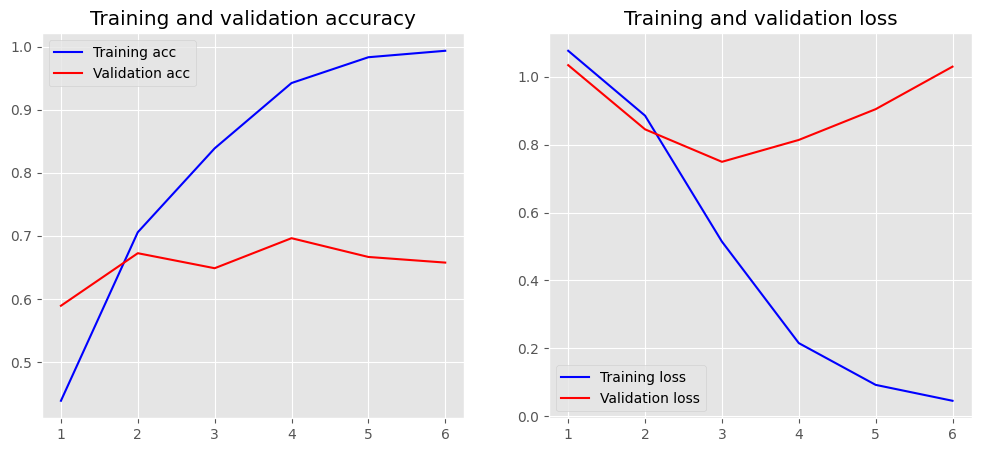

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step
Accuracy: 0.6964
Precision: 0.7259
Recall: 0.6964
F1 Score: 0.7008
Confusion Matrix:
[[87 32 10]
 [16 81  7]
 [ 5 32 66]]


**CNN**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Model definition
model = Sequential()
embedding_vector_length = 300
model.add(Embedding(vocab_size, embedding_vector_length, input_length=256, weights=[embedding_matrix], trainable=True))

# Adding CNN layers
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))  # Dropout for regularization

# Fully connected layer
model.add(Dense(3, activation='softmax'))  # 3 classes for classification

# Optimizer with reduced learning rate
optimizer = Adam(learning_rate=1e-3)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=100, validation_data=[X_test, y_test_one_hot], callbacks=[early_stopping])

# Print model summary
print(model.summary())


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - accuracy: 0.3747 - loss: 2.6933 - val_accuracy: 0.5238 - val_loss: 2.0040
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.6499 - loss: 1.7895 - val_accuracy: 0.5655 - val_loss: 1.5432
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 217ms/step - accuracy: 0.7848 - loss: 1.3155 - val_accuracy: 0.6161 - val_loss: 1.2888
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.8477 - loss: 1.0337 - val_accuracy: 0.6458 - val_loss: 1.1423
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.9106 - loss: 0.8159 - val_accuracy: 0.6607 - val_loss: 1.0485
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.9293 - loss: 0.6861 - val_accuracy: 0.6786 - val_loss: 0.9697
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.9571 - loss: 0.5509 - val_accuracy: 0.6696 - val_loss: 0.9389
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.9608 - loss: 0.4763 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 256, 300)            │       1,220,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 252, 128)            │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,237,847 (16.17 MB)

 Trainable params: 1,412,615 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,825,232 (10.78 MB)

None


In [31]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
#y_true = y_test.argmax(axis=1)  # True labels if one-hot encoded

# Calculate evaluation metrics
classification_metrics = classification_report(y_true, y_pred_classes, output_dict=True)
accuracy = accuracy_score(y_true, y_pred_classes)

# Extract overall metrics
precision = classification_metrics['weighted avg']['precision']
recall = classification_metrics['weighted avg']['recall']
f1_score = classification_metrics['weighted avg']['f1-score']

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
Precision: 0.68
Recall: 0.68
F1-Score: 0.68
Accuracy: 0.68


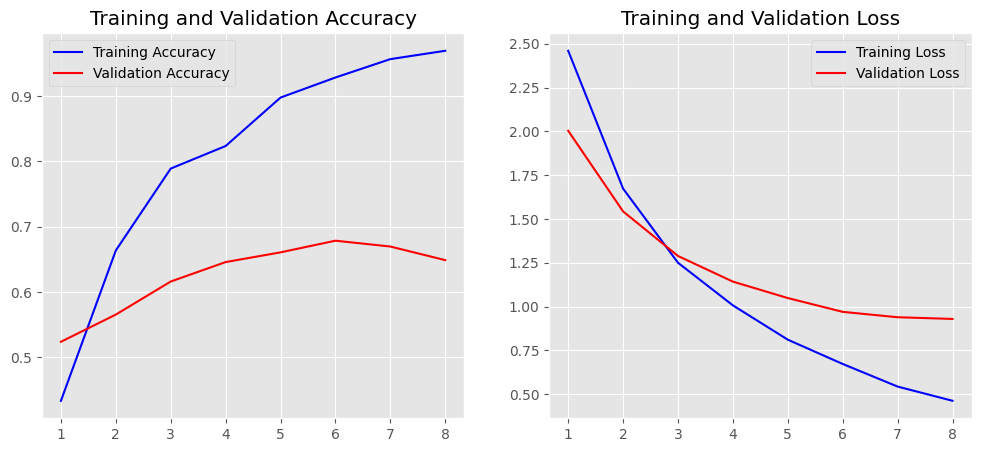

In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    """
    Plots the training and validation accuracy/loss for each epoch.

    Parameters:
    history: The training history object containing accuracy and loss metrics.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Displaying the training history of the CNN model
plot_history(history)


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Accuracy: 0.6786
Precision: 0.6759
Recall: 0.6786
F1 Score: 0.6759
Confusion Matrix:
[[92 23 14]
 [26 57 21]
 [13 11 79]]
